<a href="https://colab.research.google.com/github/woodwyyn/ML/blob/main/ML4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [135]:
 X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [136]:
model = LogisticRegression().fit(X_train, y_train)

#оценки вероятности принадлежности к каждому классу
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

#сумма по строчке всегда будет единица

array([[4.02958497e-03, 9.95970415e-01],
       [2.00643855e-03, 9.97993561e-01],
       [9.94696564e-01, 5.30343592e-03],
       [8.47909962e-01, 1.52090038e-01],
       [1.66614096e-03, 9.98333859e-01],
       [4.99240075e-01, 5.00759925e-01],
       [9.80208762e-01, 1.97912375e-02],
       [9.76507391e-01, 2.34926092e-02],
       [1.79866697e-02, 9.82013330e-01],
       [2.93132539e-01, 7.06867461e-01],
       [9.95836132e-01, 4.16386810e-03],
       [2.53456369e-01, 7.46543631e-01],
       [9.92314475e-01, 7.68552501e-03],
       [3.80237693e-02, 9.61976231e-01],
       [6.47256719e-02, 9.35274328e-01],
       [1.91873737e-01, 8.08126263e-01],
       [8.55142720e-01, 1.44857280e-01],
       [4.34150814e-02, 9.56584919e-01],
       [8.43060465e-01, 1.56939535e-01],
       [5.51009943e-02, 9.44899006e-01],
       [1.32996996e-01, 8.67003004e-01],
       [5.89343759e-01, 4.10656241e-01],
       [9.79492824e-01, 2.05071761e-02],
       [3.32717535e-01, 6.67282465e-01],
       [9.957351

Построение кривой ROC

In [137]:
"""
 Функция принимает реальные зачения X и веротяности отнесения к данному классу
 Возвращает:
  Метрика FPR (false positive rate
  Метрика TPR (true positive rate)
  значение порога
"""

fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:, 1])

In [138]:
print(f"Кол-во порогов: {len(threshold)}")

Кол-во порогов: 120


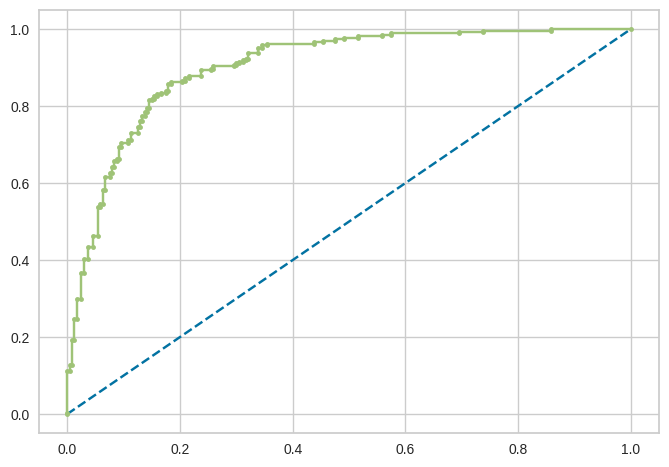

In [139]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

#классификатор работает лучше, чем случайное предсказание

In [140]:
# метрика ROC-AUC измеряет площарь кривой под графиком

print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba[:, 1]) * 100:.2f}%")

ROC-AUC: 90.28%


Построение график PR-кривой

In [141]:
from sklearn.metrics import precision_recall_curve, auc, classification_report

In [142]:
"""
 Функция принимает реальные зачения X и веротяности отнесения к данному классу
 Возвращает:
  Метрика precision массив значений точности для каждого порога.
  Метрика recall массив значений полноты для каждого порога
  значения различных порога
"""

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [143]:
print(f"Кол-во порогов: {len(thresholds)}")

Кол-во порогов: 500


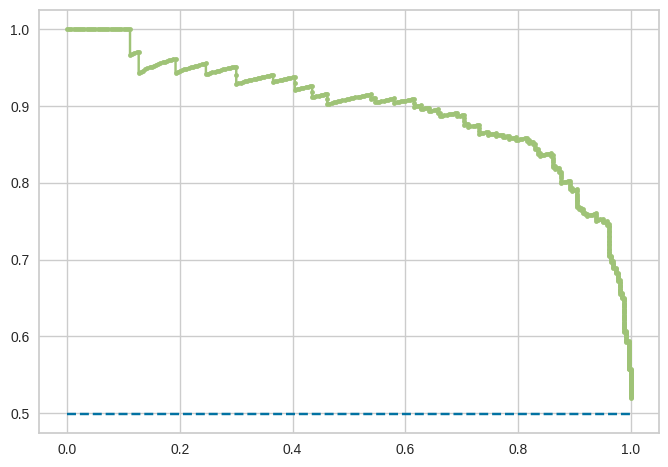

In [144]:
# прямая тривиального классификатора
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')

plt.plot(recall, precision, marker='.')
plt.show()

In [145]:
#  площадь под графиком PR-кривой - PR-AUC

print(f"AP (средней точностью модели - average precision): {auc(recall, precision) * 100:.2f}%")

AP (средней точностью модели - average precision): 89.77%


In [146]:
y_test_pred = model.predict(X_test)

# Характиризует поведение только в одной точки, при пороге по умолчанию (0.5)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



Обучение модели

In [147]:
from sklearn.neighbors import KNeighborsClassifier

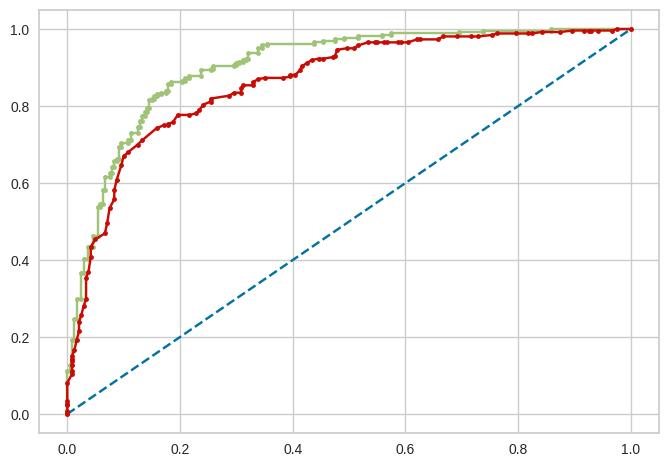

In [148]:
model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
fpr1, tpr1, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.plot(fpr1, tpr1, marker='.')
plt.grid(True)
plt.show()

# Логистическая регрессия работает лучше

In [149]:
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred2_proba[:, 1]) * 100:.2f}%")

ROC-AUC: 86.31%


Дизбаланс классов

In [150]:
# 99% отрицательных, 1% положительных
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=490, Class1=10
Тестовая: Class0=495, Class1=5


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=492, Class1=8
Тестовая: Class0=493, Class1=7


In [153]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       493
           1       0.00      0.00      0.00         7

    accuracy                           0.99       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.99      0.98       500



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ROC-кривая

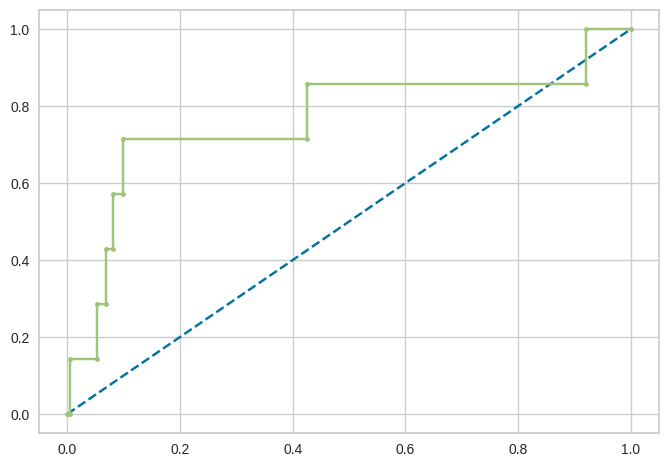

In [154]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.grid(True)
plt.show()

In [155]:
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba[:, 1]) * 100:.2f}%")

ROC-AUC: 76.38%


PR-кривая

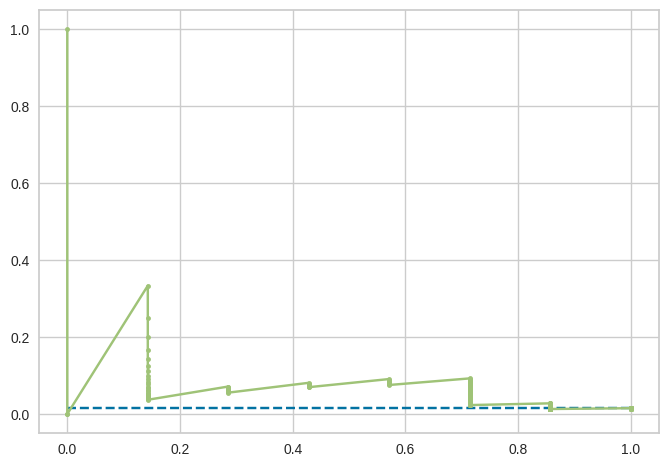

In [156]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.grid(True)
plt.show()

In [157]:
print(f"AP (средней точностью модели - average precision): {auc(recall, precision) * 100:.2f}%")

AP (средней точностью модели - average precision): 7.05%


Выбор значения порога по кривым

In [175]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

PR-кривая

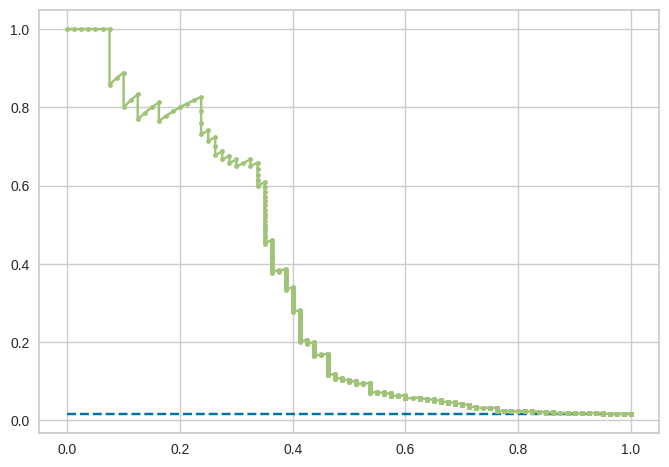

In [177]:
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.grid(True)
plt.show()

In [178]:
print(f"AP: {auc(r, p) * 100:.2f}%")

AP: 33.84%


In [179]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.77      0.12      0.22        80

    accuracy                           0.99      5000
   macro avg       0.88      0.56      0.60      5000
weighted avg       0.98      0.99      0.98      5000



при разных значениях порога иногда метрика precision будет больше, иногда - recall => будем оптимизировать по метрике F1 (F1 - это среднее геометрическое между Precision и Recall)

In [180]:
from numpy import argmax

In [181]:
f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
pr_thresholds[ix]

print('Порог=%f, F-Score=%.3f' % (pr_thresholds[ix], f1[ix]))

Порог=0.219974, F-Score=0.446


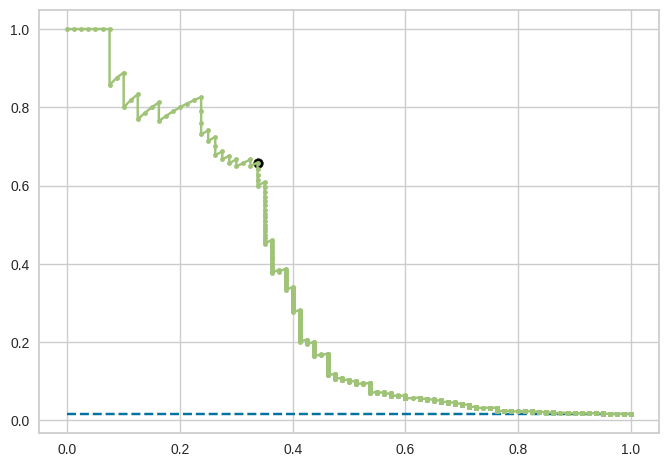

In [182]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.show()

In [183]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.65      0.33      0.43        80

    accuracy                           0.99      5000
   macro avg       0.82      0.66      0.71      5000
weighted avg       0.98      0.99      0.98      5000



In [184]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.77      0.12      0.22        80

    accuracy                           0.99      5000
   macro avg       0.88      0.56      0.60      5000
weighted avg       0.98      0.99      0.98      5000



Доп.задание

<ipython-input-188-e6f7d6fc62d6>:6: RuntimeWarning: invalid value encountered in divide
  f1 = (2 * precision * recall) / (precision + recall)
<ipython-input-188-e6f7d6fc62d6>:3: RuntimeWarning: invalid value encountered in divide
  return (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)


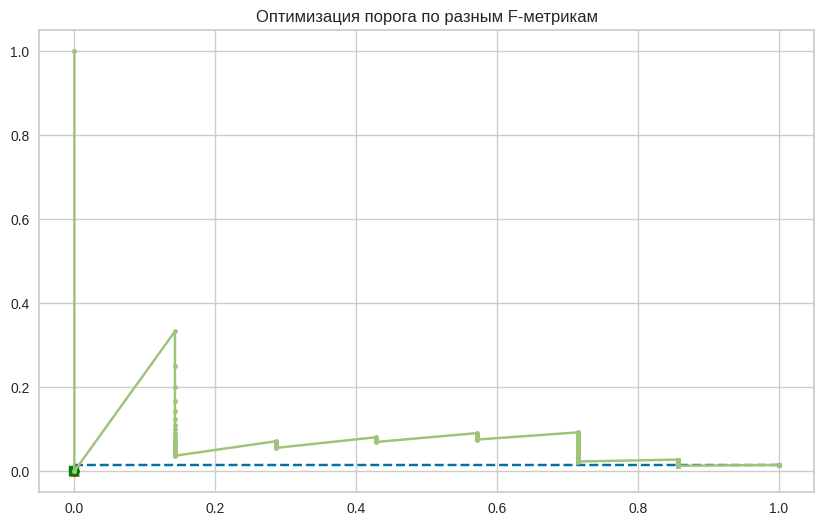


Классификационный отчет (F1-оптимальный порог):
              precision    recall  f1-score   support

           0       0.99      0.10      0.18      4920
           1       0.02      0.95      0.03        80

    accuracy                           0.11      5000
   macro avg       0.50      0.53      0.11      5000
weighted avg       0.98      0.11      0.18      5000


Классификационный отчет (F0.5-оптимальный порог - акцент на precision):
              precision    recall  f1-score   support

           0       0.99      0.10      0.18      4920
           1       0.02      0.95      0.03        80

    accuracy                           0.11      5000
   macro avg       0.50      0.53      0.11      5000
weighted avg       0.98      0.11      0.18      5000


Классификационный отчет (F2-оптимальный порог - акцент на recall):
              precision    recall  f1-score   support

           0       0.99      0.10      0.18      4920
           1       0.02      0.95      0.03    

In [188]:
# F-метрика с акцентом на precision (beta < 1)
def f_beta(precision, recall, beta=0.5):
    return (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)

# F-метрика с акцентом на recall (beta > 1)
f1 = (2 * precision * recall) / (precision + recall)
f_half = f_beta(precision, recall, beta=0.5)
f2 = f_beta(precision, recall, beta=2)

# Находим оптимальные пороги
ix_f1 = argmax(f1)
ix_f_half = argmax(f_half[:-1])  # Убираем последний элемент, так как thresholds_pr на 1 меньше
ix_f2 = argmax(f2[:-1])

best_threshold_f1 = pr_thresholds[ix_f1]
best_threshold_f_half = pr_thresholds[ix_f_half]
best_threshold_f2 = pr_thresholds[ix_f2]

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.', label='PR-кривая')

plt.scatter(recall[ix_f1], precision[ix_f1], marker='o', color='black', label=f'F1 (порог={best_threshold_f1:.3f})')
plt.scatter(recall[ix_f_half], precision[ix_f_half], marker='^', color='red', label=f'F0.5 (порог={best_threshold_f_half:.3f})')
plt.scatter(recall[ix_f2], precision[ix_f2], marker='s', color='green', label=f'F2 (порог={best_threshold_f2:.3f})')

plt.title('Оптимизация порога по разным F-метрикам')
plt.grid(True)
plt.show()

# Отчеты для разных порогов
print("\nКлассификационный отчет (F1-оптимальный порог):")
y_pred_f1 = (y_pred_proba[:, 1] > best_threshold_f1).astype('int')
print(classification_report(y_test, y_pred_f1))

print("\nКлассификационный отчет (F0.5-оптимальный порог - акцент на precision):")
y_pred_f_half = (y_pred_proba[:, 1] > best_threshold_f_half).astype('int')
print(classification_report(y_test, y_pred_f_half))

print("\nКлассификационный отчет (F2-оптимальный порог - акцент на recall):")
y_pred_f2 = (y_pred_proba[:, 1] > best_threshold_f2).astype('int')
print(classification_report(y_test, y_pred_f2))

In [173]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba[:, 1])

gmean = np.sqrt(tpr * (1 - fpr))
ix = argmax(gmean)
best_threshold_roc = thresholds_roc[ix]

print(f'Оптимальный порог по ROC: {best_threshold_roc:.3f}')
print(f'Оптимальное среднее геометрическое: {gmean[ix]:.3f}')

y_pred_roc = (y_pred_proba[:, 1] > best_threshold_roc).astype('int')
print("\nКлассификационный отчет (оптимальный порог по ROC):")
print(classification_report(y_test, y_pred_roc))

Оптимальный порог по ROC: 0.025
Оптимальное среднее геометрическое: 0.738

Классификационный отчет (оптимальный порог по ROC):
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      4920
           1       0.07      0.61      0.13        80

    accuracy                           0.87      5000
   macro avg       0.53      0.74      0.53      5000
weighted avg       0.98      0.87      0.91      5000



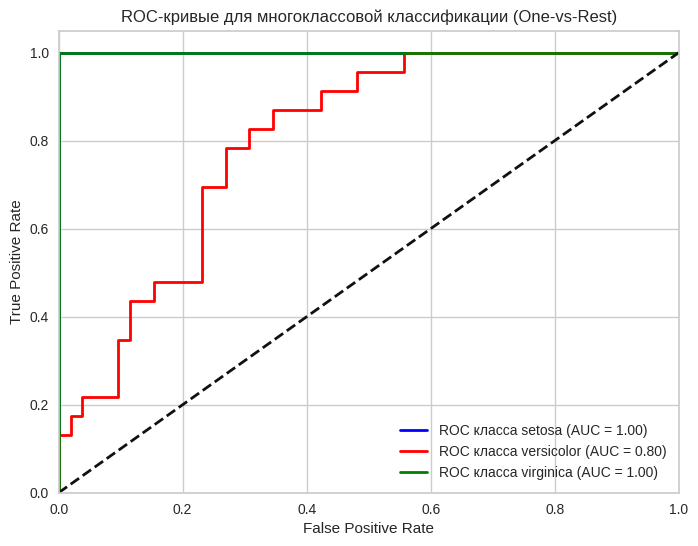

In [194]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
thresholds = dict()

for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC класса {0} (AUC = {1:0.2f})'
             ''.format(iris.target_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для многоклассовой классификации (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()

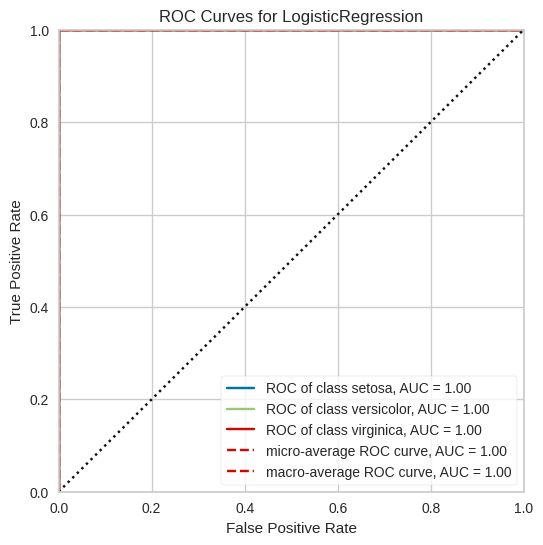

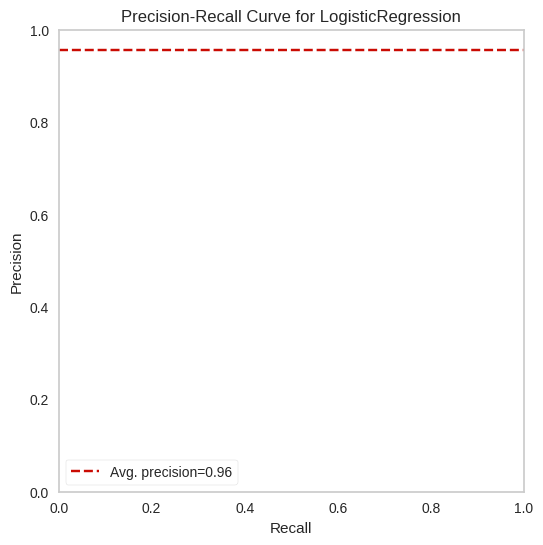

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [198]:
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

plt.figure(figsize=(6, 6))
visualizer = ROCAUC(model, classes=iris.target_names)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

plt.figure(figsize=(6, 6))
visualizer = PrecisionRecallCurve(
    LogisticRegression(max_iter=1000),
    classes=iris.target_names,
    micro=False
)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()